In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
#from termcolor import colored
from numbers import Number
from scipy import stats
from pandas import plotting
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
LARGE_FILE = "loan_data_converted.csv"
CHUNKSIZE = 100000 # processing 100,000 rows at a time
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, low_memory=False)
frames = []

In [3]:
for df in reader:
    frames.append(df)
loan_data = pd.concat(frames)

Fistly, we check the economic meaning of all variables(except for columns which are suggested to be dropped because of the data quality). 
Then we select nearly 40 variables may have correlations.
Finally, we plot the pearson correlation matrix to check the correlation.

In [9]:
index=["loan_amnt","purpose","term","last_pymnt_amnt","emp_length","dti","application_type","annual_inc"
   ,"verification_status","home_ownership","delinq_2yrs","pub_rec_bankruptcies","open_rv_12m","mo_sin_rcnt_rev_tl_op","mort_acc","inq_fi","inq_last_12m","loan_status","mths_since_recent_inq","tot_coll_amt","tot_cur_bal","avg_cur_bal",
   "total_acc","mo_sin_rcnt_rev_tl_op","num_sats","total_rec_int","total_rec_prncp","num_tl_90g_dpd_24m","annual_inc_joint","initial_list_status","mo_sin_old_il_acct","zip_code","chargeoff_within_12_mths","open_il_12m",
      "mort_acc"]


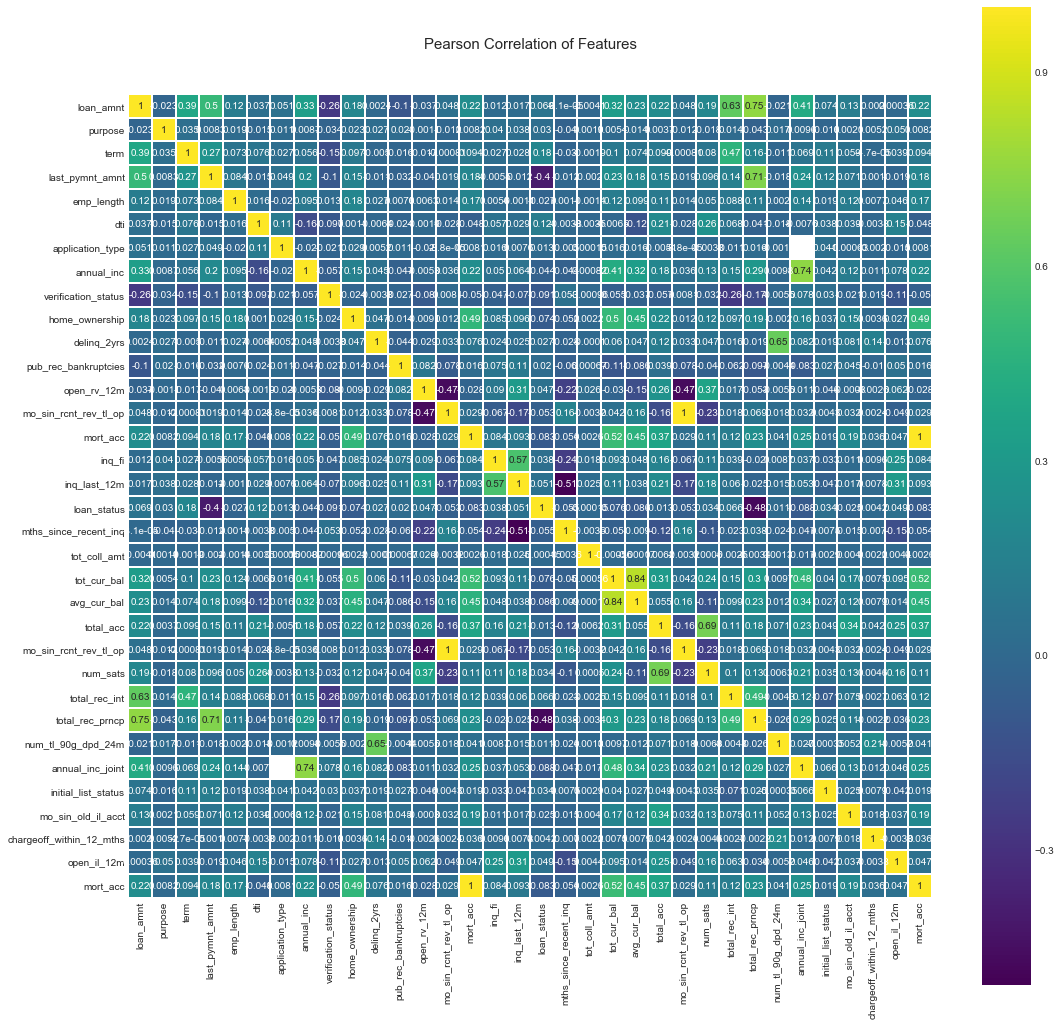

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
a=sns.heatmap(loan_data[index].corr(),linewidths=1.0,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

We choose loan_status as Y variable and others as X variables
we want to check the correlation with Y and X
We list five examples below

1. loan_status with application_type(the histogram of loan_status when application type is individual or joint)
4:"In Grace Period"
5:"Late (16-30 days)"
6:"Late (31-120 days)"
Apparently, we can find that when the application_type is joint, the default rates dramatically increase 

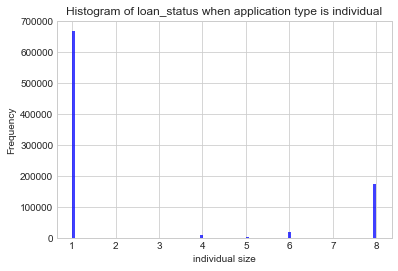

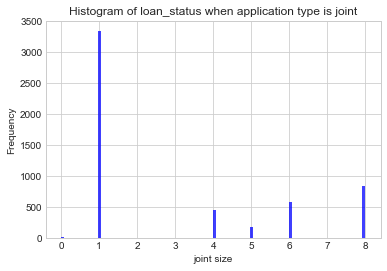

In [19]:
individual=[]
joint=[]
for idx,value in enumerate(loan_data['application_type']):
    if value==1:
        individual.append(loan_data['loan_status'][idx])
    else:
        joint.append(loan_data['loan_status'][idx])
plt.hist(individual, 100, facecolor='blue', alpha=0.75)
plt.xlabel("individual size")
plt.ylabel("Frequency")
plt.title("Histogram of loan_status when application type is individual")
plt.show()        
plt.hist(joint, 100, facecolor='blue', alpha=0.75)
plt.xlabel("joint size")
plt.ylabel("Frequency")
plt.title("Histogram of loan_status when application type is joint")
plt.show()   

2. loan_status & emp_length

Then we want to explore the relatonship between loan_status with employee length
We can easily find that the loan_status are not influenced by the working length.


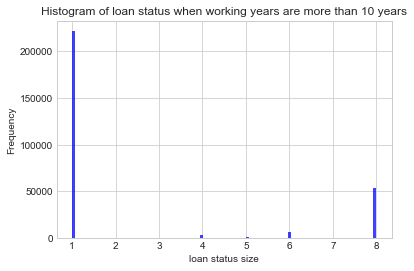

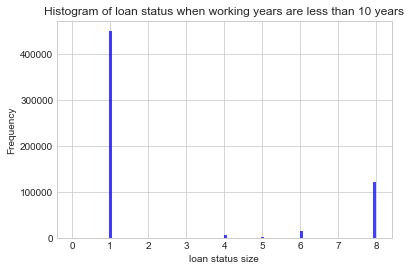

In [4]:
More_than_10=[]
Less_than_10=[]
for idx,value in enumerate(loan_data['emp_length']):
    if value==10:
        More_than_10.append(loan_data['loan_status'][idx])
    else:
        Less_than_10.append(loan_data['loan_status'][idx])
plt.hist(More_than_10, 100, facecolor='blue', alpha=0.75)
plt.xlabel("loan status size")
plt.ylabel("Frequency")
plt.title("Histogram of loan status when working years are more than 10 years")
plt.show()        
plt.hist(Less_than_10, 100, facecolor='blue', alpha=0.75)
plt.xlabel("loan status size")
plt.ylabel("Frequency")
plt.title("Histogram of loan status when working years are less than 10 years")
plt.show()  

3. loan status & purpose(divide by 'debt consolidation' and others)
  According to the histogram and ratio calculated below, we found that when the purpose are others, the default rate is less when the purpose
  is "debt consolidation" (Although the difference is only 3 percent, we still think it should be considered because of the large data)

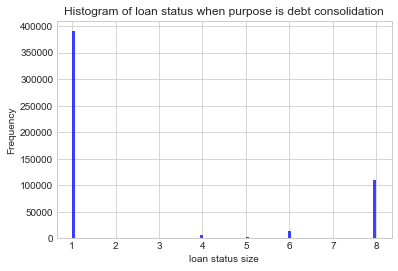

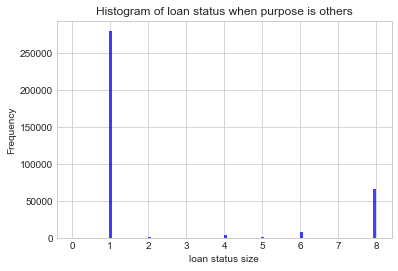

In [5]:
debt=[]
others=[]
for idx,value in enumerate(loan_data['purpose']):
    if value==6:
        debt.append(loan_data['loan_status'][idx])
    else:
        others.append(loan_data['loan_status'][idx])
plt.hist(debt, 100, facecolor='blue', alpha=0.75)
plt.xlabel("loan status size")
plt.ylabel("Frequency")
plt.title("Histogram of loan status when purpose is debt consolidation")
plt.show()
plt.hist(others, 100, facecolor='blue', alpha=0.75)
plt.xlabel("loan status size")
plt.ylabel("Frequency")
plt.title("Histogram of loan status when purpose is others")
plt.show()


In [12]:
sum1=0
for i in debt:
    if i==1:
        sum1+=1
ratio1=float(sum1)/float(len(debt))
print("the percentage of fully paid in all when purpose is debt consolidaton=",ratio1)
sum2=0
for i in others:
    if i==1:
        sum2+=1
ratio2=float(sum2)/float(len(others))
print("the percentage of fully paid in all when purpose is others=",ratio2)

('the percentage of fully paid in all when purpose is debt consolidaton=', 0.7444316846490759)
('the percentage of fully paid in all when purpose is others=', 0.7723278779089842)


4. loan_status & delinq_2yrs
  When deliquency exists, the ratio of default is larger

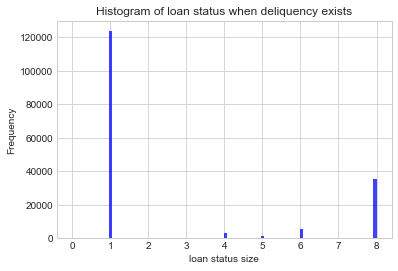

Text(0.5,1,u'Histogram of loan status when deliquency does not exist')

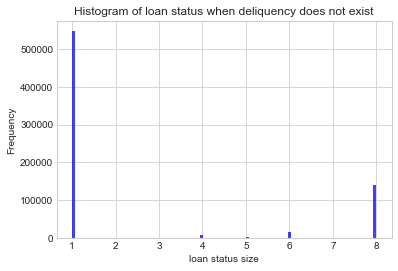

In [14]:
delinq_Y=[]
delinq_N=[]
for idx,value in enumerate(loan_data['delinq_2yrs']):
    if value==0:
        delinq_N.append(loan_data['loan_status'][idx])
    else:
        delinq_Y.append(loan_data['loan_status'][idx])
plt.hist(delinq_Y, 100, facecolor='blue', alpha=0.75)
plt.xlabel("loan status size")
plt.ylabel("Frequency")
plt.title("Histogram of loan status when deliquency exists")
plt.show()
plt.hist(delinq_N, 100, facecolor='blue', alpha=0.75)
plt.xlabel("loan status size")
plt.ylabel("Frequency")
plt.title("Histogram of loan status when deliquency does not exist")

In [16]:
sum1=0
for i in delinq_Y:
    if i==1:
        sum1+=1
ratio1=float(sum1)/float(len(delinq_Y))
print("the percentage of fully paid in all when when deliquency exists=",ratio1)
sum2=0
for i in delinq_N:
    if i==1:
        sum2+=1
ratio2=float(sum2)/float(len(delinq_N))
print("the percentage of fully paid in all when when deliquency does not exist=",ratio2)

('the percentage of fully paid in all when when deliquency exists=', 0.7295058740185371)
('the percentage of fully paid in all when when deliquency does not exist=', 0.7620467851757199)


5. loan_status & dti
  According the below pdf() plot, When "fully paid", the mean of dti is even higher than "Default",which is contrast to what we imagine. 
  So, we doubt the data quality(verified?) of dti
  

In [32]:
Default=[]
Fully_Paid=[]
for idx,value in enumerate(loan_data['loan_status']):
    if loan_data['dti'][idx]!=' ':
        if value==1:
            Fully_Paid.append(loan_data['dti'][idx])
        else:
            Default.append(loan_data['dti'][idx])


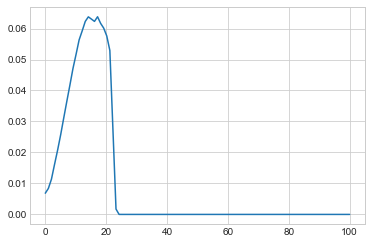

In [57]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace
Fully_Paid.sort()
kde = gaussian_kde( Fully_Paid[:100000] )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( 0.01, 100, 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

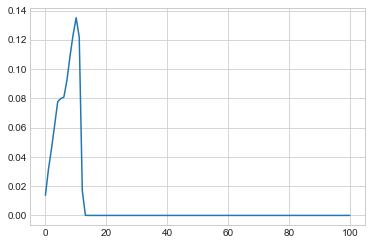

In [61]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace
Default.sort()
kde = gaussian_kde( Default[:10000] )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( 0.01, 100, 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )